<a href="https://colab.research.google.com/github/SherZhou/First-Pulsar-Analysis-by-NN/blob/main/NN_with_pulsar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/pulsar/train_agnpsr_3fgl.csv")
test = pd.read_csv("/content/drive/MyDrive/pulsar/test_agnpsr_3fgl.csv")
train.pop('Unnamed: 0')
test.pop('Unnamed: 0')
train.head()

,RAJ2000,DEJ2000,GLON,GLAT,Spectral_Index,Energy_Flux100,Variability_Index,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,...,SED100_300,SED300_1000,SED1000_3000,SED3000_10000,SED10000_100000,hr12,hr23,hr34,hr45,pulsarness
0,95.734596,33.435699,179.940521,9.156562,2.095130,7.052909e-11,8.071574,0.011594,0.010731,-70.209999,...,1.564077e-11,1.546385e-11,1.247502e-11,9.954384e-12,5.336531e-12,-0.005688,-0.106978,-0.112381,-0.302000,Non-Pulsar
1,133.573196,44.145302,176.658417,40.073395,1.809473,1.969699e-12,3.616089,0.052360,0.044774,76.000000,...,3.562510e-13,7.509623e-17,2.328259e-13,5.726554e-13,2.570380e-13,-0.999578,0.999355,0.421896,-0.380402,Non-Pulsar
2,196.714294,-21.777500,307.674133,40.952179,2.146640,3.838126e-12,3.582412,0.060131,0.050263,-63.889999,...,9.910775e-13,4.634844e-13,6.180396e-13,5.043158e-13,2.370166e-13,-0.362716,0.142905,-0.101326,-0.360566,Non-Pulsar
3,322.890808,-9.252800,43.894054,-39.666561,2.024412,9.606827e-12,3.984136,0.021585,0.020414,-19.200001,...,1.653001e-12,1.823058e-12,9.776664e-13,1.121859e-12,2.038277e-12,0.048922,-0.301848,0.068679,0.289993,Non-Pulsar
4,70.082100,-25.014900,224.260254,-39.008392,1.724326,2.226922e-12,3.559208,0.042061,0.040951,14.810000,...,1.931473e-14,5.090122e-18,2.462666e-13,6.128085e-13,1.776052e-13,-0.999473,0.999959,0.426670,-0.550602,Non-Pulsar


In [ ]:
# calculate and drop nan value
train.isna().sum()

RAJ2000               0
DEJ2000               0
GLON                  0
GLAT                  0
Spectral_Index        0
Energy_Flux100        0
Variability_Index     0
Conf_68_SemiMajor     0
Conf_68_SemiMinor     0
Conf_68_PosAng        0
Conf_95_SemiMajor     0
Conf_95_SemiMinor     0
Conf_95_PosAng        0
Signif_Avg            0
Pivot_Energy          0
Flux_Density          0
Unc_Flux_Density      0
Flux1000              0
Unc_Flux1000          0
Unc_Energy_Flux100    0
Signif_Curve          0
Flux100_300           0
Flux300_1000          0
Flux1000_3000         0
Flux3000_10000        0
Flux10000_100000      0
SED100_300            0
SED300_1000           0
SED1000_3000          0
SED3000_10000         0
SED10000_100000       0
hr12                  0
hr23                  0
hr34                  0
hr45                  0
pulsarness            0
dtype: int64

In [ ]:
print(train.shape[0],train.shape[1])

1333 36


In [ ]:
# change target into number
train['pulsarness'] = pd.Categorical(train['pulsarness'])
train['pulsarness'] = train.pulsarness.cat.codes
test['pulsarness'] = pd.Categorical(test['pulsarness'])
test['pulsarness'] = test.pulsarness.cat.codes

In [ ]:

# data['target_class'] = data['target_class'].replace([1],-1)
# data['target_class'] = data['target_class'].replace([0],1)

In [ ]:
# split train and target
x_train = train.drop(['pulsarness'], axis=1)
x_test = test.drop(['pulsarness'], axis=1)
y_train = train['pulsarness']
y_test = test['pulsarness']

In [ ]:
# change target as the format of int32
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RAJ2000             1333 non-null   float64
 1   DEJ2000             1333 non-null   float64
 2   GLON                1333 non-null   float64
 3   GLAT                1333 non-null   float64
 4   Spectral_Index      1333 non-null   float64
 5   Energy_Flux100      1333 non-null   float64
 6   Variability_Index   1333 non-null   float64
 7   Conf_68_SemiMajor   1333 non-null   float64
 8   Conf_68_SemiMinor   1333 non-null   float64
 9   Conf_68_PosAng      1333 non-null   float64
 10  Conf_95_SemiMajor   1333 non-null   float64
 11  Conf_95_SemiMinor   1333 non-null   float64
 12  Conf_95_PosAng      1333 non-null   float64
 13  Signif_Avg          1333 non-null   float64
 14  Pivot_Energy        1333 non-null   float64
 15  Flux_Density        1333 non-null   float64
 16  Unc_Fl

 ## dnn with tensorflow


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))

In [ ]:
# dataset = tf.data.Dataset.from_tensor_slices((train.values, target.values))

In [ ]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 9.57345963e+01  3.34356995e+01  1.79940521e+02  9.15656185e+00
  2.09512973e+00  7.05290895e-11  8.07157405e+00  1.15944734e-02
  1.07310554e-02 -7.02099991e+01  1.87999997e-02  1.74000002e-02
 -7.02099991e+01  5.61443443e+01  6.22975423e+00 -2.40132684e+01
 -2.75127237e+01  7.03040426e-09  2.41814430e-10 -2.67426522e+01
  1.08934402e+00  6.57228227e-08  2.27865282e-08  5.24202548e-09
  1.46681378e-09 -2.18877278e+01  1.56407717e-11  1.54638484e-11
  1.24750156e-11  9.95438434e-12  5.33653082e-12 -5.68800576e-03
 -1.06977609e-01 -1.12380680e-01 -3.01999813e-01], Target: 0
Features: [ 1.33573196e+02  4.41453018e+01  1.76658417e+02  4.00733948e+01
  1.80947304e+00  1.96969914e-12  3.61608900e+00  5.23601472e-02
  4.47744019e-02  7.60000000e+01  8.48999992e-02  7.25999996e-02
  7.60000000e+01  4.32555771e+00  8.35960441e+00 -3.22746459e+01
 -3.34470409e+01  1.60510910e-10  5.07220342e-11 -2.80902571e+01
  4.93825626e-01  1.45729451e-09  1.07156187e-13  9.52406834e-11
  8.17132

In [ ]:
train_dataset = dataset.shuffle(len(train)).batch(1)

In [ ]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
def get_compiled_model12():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model = get_compiled_model()
history = model.fit(train_dataset, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
1333/1333 [==============================] - 4s 2ms/step - loss: 1.8124 - accuracy: 0.8320 - val_loss: 0.3910 - val_accuracy: 0.9037
Epoch 2/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.3888 - accuracy: 0.9032 - val_loss: 0.3983 - val_accuracy: 0.9019
Epoch 3/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.3047 - accuracy: 0.9047 - val_loss: 0.3511 - val_accuracy: 0.9089
Epoch 4/100
1333/1333 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.9100 - val_loss: 0.3548 - val_accuracy: 0.8949
Epoch 5/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2719 - accuracy: 0.9115 - val_loss: 0.3289 - val_accuracy: 0.8932
Epoch 6/100
1333/1333 [==============================] - 3s 2ms/step - loss: 0.2598 - accuracy: 0.9152 - val_loss: 0.3034 - val_accuracy: 0.9124
Epoch 7/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2577 - accuracy: 0.9137 - val_loss: 0.2751 - val_ac

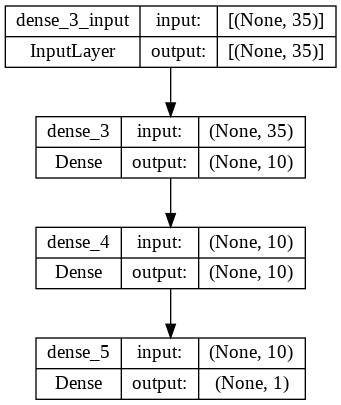

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,'new_model.png',show_shapes=True)

In [ ]:
model12 = get_compiled_model12()
history12 = model12.fit(train_dataset, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
1333/1333 [==============================] - 3s 2ms/step - loss: 0.4080 - accuracy: 0.8957 - val_loss: 0.2935 - val_accuracy: 0.9072
Epoch 2/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2917 - accuracy: 0.9092 - val_loss: 0.2954 - val_accuracy: 0.9072
Epoch 3/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2640 - accuracy: 0.9115 - val_loss: 0.2706 - val_accuracy: 0.9089
Epoch 4/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2425 - accuracy: 0.9137 - val_loss: 0.2558 - val_accuracy: 0.9142
Epoch 5/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2399 - accuracy: 0.9145 - val_loss: 0.2189 - val_accuracy: 0.9194
Epoch 6/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2213 - accuracy: 0.9197 - val_loss: 0.2064 - val_accuracy: 0.9229
Epoch 7/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2055 - accuracy: 0.9175 - val_loss: 0.2427 - val_ac

In [ ]:
# get results
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

18/18 - 0s - loss: 0.0930 - accuracy: 0.9685 - 36ms/epoch - 2ms/step
[0.09300518035888672, 0.9684763550758362]


In [ ]:
# plot results
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print(min(history_dict['loss']),min(history_dict['val_loss']),max(history_dict['accuracy']),max(history_dict['val_accuracy']))

0.06440863013267517 0.07333105802536011 0.9767441749572754 0.9789842367172241


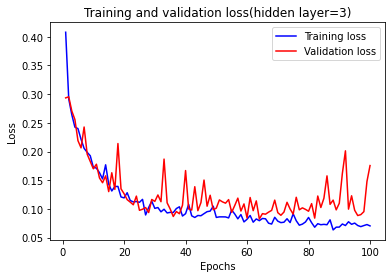

In [ ]:
# plot results
history_dict12 = history12.history
history_dict12.keys()
acc12 = history_dict12['accuracy']
val_acc12 = history_dict12['val_accuracy']
loss12 = history_dict12['loss']
val_loss12 = history_dict12['val_loss']

epochs = range(1, len(acc) + 1)

# “bo” represents "blue point"
plt.plot(epochs, loss12, 'b', label='Training loss',markersize=2)
# b represents “blue line”
plt.plot(epochs, val_loss12, 'r', label='Validation loss',markersize=3)
plt.title('Training and validation loss(hidden layer=3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

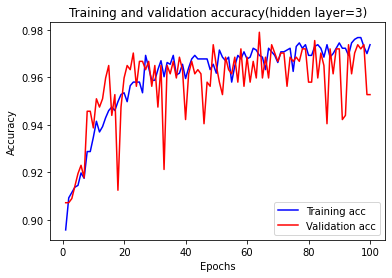

In [ ]:
plt.clf()   # 清除数字
plt.plot(epochs, acc12, 'b', label='Training acc',markersize=2)
plt.plot(epochs, val_acc12, 'r', label='Validation acc',markersize=3)
plt.title('Training and validation accuracy(hidden layer=3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

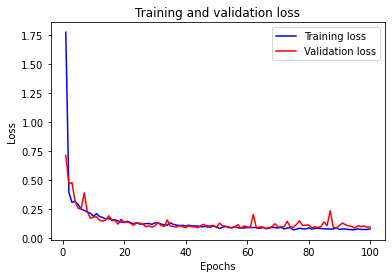

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo” represents "blue point"
plt.plot(epochs, loss, 'b', label='Training loss',markersize=2)
# b represents “blue line”
plt.plot(epochs, val_loss, 'r', label='Validation loss',markersize=3)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

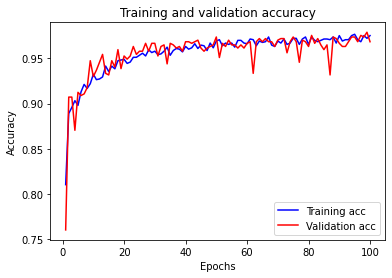

In [ ]:
plt.clf()   # 清除数字
plt.plot(epochs, acc, 'b', label='Training acc',markersize=2)
plt.plot(epochs, val_acc, 'r', label='Validation acc',markersize=3)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = get_compiled_model()
history2 = model.fit(train_dataset, epochs=200,validation_data=(x_test, y_test))

Epoch 1/200
1333/1333 [==============================] - 4s 2ms/step - loss: 0.6195 - accuracy: 0.8897 - val_loss: 0.2999 - val_accuracy: 0.9072
Epoch 2/200
1333/1333 [==============================] - 3s 2ms/step - loss: 0.3326 - accuracy: 0.9017 - val_loss: 0.2947 - val_accuracy: 0.9124
Epoch 3/200
1333/1333 [==============================] - 3s 2ms/step - loss: 0.2697 - accuracy: 0.9130 - val_loss: 0.2922 - val_accuracy: 0.9089
Epoch 4/200
1333/1333 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9122 - val_loss: 0.3130 - val_accuracy: 0.9142
Epoch 5/200
1333/1333 [==============================] - 3s 2ms/step - loss: 0.2541 - accuracy: 0.9167 - val_loss: 0.2799 - val_accuracy: 0.9089
Epoch 6/200
1333/1333 [==============================] - 3s 2ms/step - loss: 0.2365 - accuracy: 0.9137 - val_loss: 0.2464 - val_accuracy: 0.9142
Epoch 7/200
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2301 - accuracy: 0.9152 - val_loss: 0.2504 - val_ac

In [ ]:
model

In [ ]:
history_dict2 = history2.history

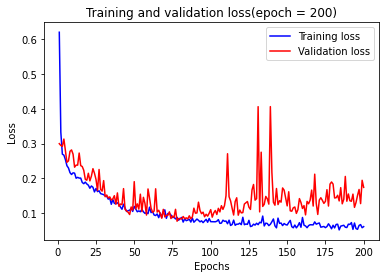

In [ ]:
import matplotlib.pyplot as plt
acc = history_dict2['accuracy']
val_acc = history_dict2['val_accuracy']
loss = history_dict2['loss']
val_loss = history_dict2['val_loss']

epochs = range(1, len(acc) + 1)

# “bo” represents "blue point"
plt.plot(epochs, loss, 'b', label='Training loss',markersize=2)
# b represents “blue line”
plt.plot(epochs, val_loss, 'r', label='Validation loss',markersize=3)
plt.title('Training and validation loss(epoch = 200)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

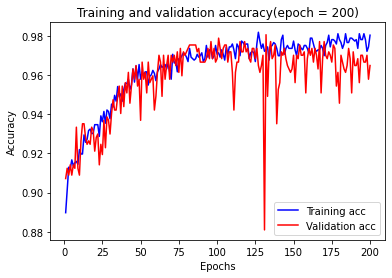

In [ ]:
plt.clf()   # 清除数字
plt.plot(epochs, acc, 'b', label='Training acc',markersize=2)
plt.plot(epochs, val_acc, 'r', label='Validation acc',markersize=3)
plt.title('Training and validation accuracy(epoch = 200)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
def get_compiled_model2():
  model = tf.keras.Sequential([
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model2 = get_compiled_model2()
history3 = model2.fit(train_dataset, epochs=100,validation_data=(x_test, y_test))
history_dict3 = history3.history

Epoch 1/100
1333/1333 [==============================] - 28s 20ms/step - loss: 3.0222 - accuracy: 0.8132 - val_loss: 0.9167 - val_accuracy: 0.8459
Epoch 2/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.6742 - accuracy: 0.8687 - val_loss: 0.4383 - val_accuracy: 0.8932
Epoch 3/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.3769 - accuracy: 0.8860 - val_loss: 0.3411 - val_accuracy: 0.8634
Epoch 4/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.9025 - val_loss: 0.2646 - val_accuracy: 0.9124
Epoch 5/100
1333/1333 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.9100 - val_loss: 0.2261 - val_accuracy: 0.9229
Epoch 6/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2306 - accuracy: 0.9130 - val_loss: 0.3517 - val_accuracy: 0.8354
Epoch 7/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2257 - accuracy: 0.9182 - val_loss: 0.2949 - val_

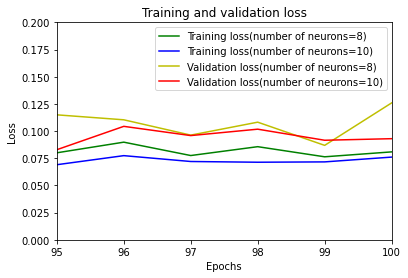

In [ ]:
acc3 = history_dict3['accuracy']
val_acc3 = history_dict3['val_accuracy']
loss3 = history_dict3['loss']
val_loss3 = history_dict3['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc32 = history_dict32['accuracy']
val_acc32 = history_dict32['val_accuracy']
loss32 = history_dict32['loss']
val_loss32 = history_dict32['val_loss']

epochs = range(1, len(acc) + 1)

# “bo” represents "blue point"
plt.plot(epochs, loss3, 'g', label='Training loss(number of neurons=8)',markersize=2)
plt.plot(epochs, loss, 'b', label='Training loss(number of neurons=10)',markersize=2)
plt.plot(epochs, loss32, 'b', label='Training loss(number of neurons=12)',markersize=2)

# b represents “blue line”
plt.plot(epochs, val_loss3, 'y', label='Validation loss(number of neurons=8)',markersize=3)
plt.plot(epochs, val_loss, 'r', label='Validation loss(number of neurons=10)',markersize=3)
plt.plot(epochs, val_loss32, 'r', label='Validation loss(number of neurons=12)',markersize=3)


plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim((95, 100))
plt.ylim((0, 0.2))
plt.show()

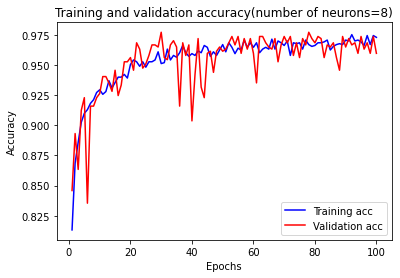

In [ ]:
plt.clf()   # 清除数字
plt.plot(epochs, acc, 'b', label='Training acc',markersize=2)
plt.plot(epochs, val_acc, 'r', label='Validation acc',markersize=3)
plt.title('Training and validation accuracy(number of neurons=8)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
def get_compiled_model3():
  model = tf.keras.Sequential([
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model3 = get_compiled_model3()
history32 = model3.fit(train_dataset, epochs=100,validation_data=(x_test, y_test))
history_dict32 = history32.history

Epoch 1/100
1333/1333 [==============================] - 3s 2ms/step - loss: 1.2446 - accuracy: 0.8447 - val_loss: 0.4315 - val_accuracy: 0.9019
Epoch 2/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.3997 - accuracy: 0.8927 - val_loss: 0.2776 - val_accuracy: 0.9142
Epoch 3/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.3568 - accuracy: 0.9017 - val_loss: 0.4354 - val_accuracy: 0.8231
Epoch 4/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.3202 - accuracy: 0.9092 - val_loss: 0.3422 - val_accuracy: 0.9142
Epoch 5/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.3080 - accuracy: 0.9047 - val_loss: 0.2809 - val_accuracy: 0.9037
Epoch 6/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2737 - accuracy: 0.9092 - val_loss: 0.2700 - val_accuracy: 0.9194
Epoch 7/100
1333/1333 [==============================] - 2s 2ms/step - loss: 0.2562 - accuracy: 0.9167 - val_loss: 0.2779 - val_ac

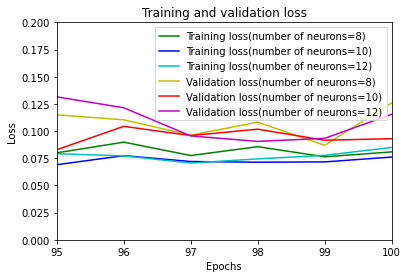

In [ ]:
acc3 = history_dict3['accuracy']
val_acc3 = history_dict3['val_accuracy']
loss3 = history_dict3['loss']
val_loss3 = history_dict3['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc32 = history_dict32['accuracy']
val_acc32 = history_dict32['val_accuracy']
loss32 = history_dict32['loss']
val_loss32 = history_dict32['val_loss']

epochs = range(1, len(acc) + 1)

# “bo” represents "blue point"
plt.plot(epochs, loss3, 'g', label='Training loss(number of neurons=8)',markersize=2)
plt.plot(epochs, loss, 'b', label='Training loss(number of neurons=10)',markersize=2)
plt.plot(epochs, loss32, 'c', label='Training loss(number of neurons=12)',markersize=2)

# b represents “blue line”
plt.plot(epochs, val_loss3, 'y', label='Validation loss(number of neurons=8)',markersize=3)
plt.plot(epochs, val_loss, 'r', label='Validation loss(number of neurons=10)',markersize=3)
plt.plot(epochs, val_loss32, 'm', label='Validation loss(number of neurons=12)',markersize=3)


plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim((95, 100))
plt.ylim((0, 0.2))
plt.show()

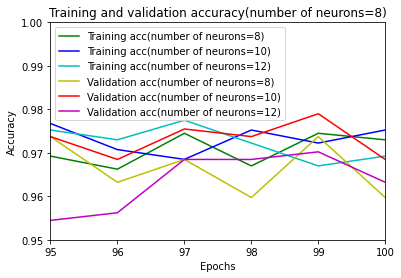

In [ ]:
plt.clf()   # 清除数字
plt.plot(epochs, acc3, 'g', label='Training acc(number of neurons=8)',markersize=2)
plt.plot(epochs, acc, 'b', label='Training acc(number of neurons=10)',markersize=2)
plt.plot(epochs, acc32, 'c', label='Training acc(number of neurons=12)',markersize=2)

plt.plot(epochs, val_acc3, 'y', label='Validation acc(number of neurons=8)',markersize=3)
plt.plot(epochs, val_acc, 'r', label='Validation acc(number of neurons=10)',markersize=3)
plt.plot(epochs, val_acc32, 'm', label='Validation acc(number of neurons=12)',markersize=3)

plt.title('Training and validation accuracy(number of neurons=8)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim((95, 100))
plt.ylim((0.95, 1))
plt.show()

## Estimator by tensorflow


In [ ]:
def input_fn(features, labels, training=True, batch_size=1):
    """An input function for training or evaluating"""
    # 将输入转换为数据集。
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # 如果在训练模式下混淆并重复数据。
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

In [ ]:
# 特征列描述了如何使用输入。
my_feature_columns = []
for key in x_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [ ]:
# 构建一个拥有两个隐层，隐藏节点分别为 30 和 10 的深度神经网络。
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # 隐层所含结点数量分别为 30 和 10.
    hidden_units=[30, 10],
    # 模型必须从三个类别中做出选择。
    n_classes=2)

In [ ]:
# 训练模型。
history3 = classifier.train(
    input_fn=lambda: input_fn(x_train, y_train, training=True),
    steps=1000)

In [ ]:
history_dict3 = history3.history
history_dict3

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(x_test, y_test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.905



In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          571 non-null    int64  
 1   RAJ2000             571 non-null    float64
 2   DEJ2000             571 non-null    float64
 3   GLON                571 non-null    float64
 4   GLAT                571 non-null    float64
 5   Spectral_Index      571 non-null    float64
 6   Energy_Flux100      571 non-null    float64
 7   Variability_Index   571 non-null    float64
 8   Conf_68_SemiMajor   571 non-null    float64
 9   Conf_68_SemiMinor   571 non-null    float64
 10  Conf_68_PosAng      571 non-null    float64
 11  Conf_95_SemiMajor   571 non-null    float64
 12  Conf_95_SemiMinor   571 non-null    float64
 13  Conf_95_PosAng      571 non-null    float64
 14  Signif_Avg          571 non-null    float64
 15  Pivot_Energy        571 non-null    float64
 16  Flux_Den